# TRABAJO PRÁCTICO N° 2

## Parte 1 - Ejercicio 1


Según el INDEC, una persona se considera desocupada si no tiene trabajo, está buscando activamente uno y está disponible para empezar a trabajar. Esto lo identifican a través de una encuesta llamada EPH (Encuesta Permanente de Hogares), donde hacen preguntas sobre si la persona trabajó en la semana anterior, si buscó trabajo y si estaría dispuesta a empezar en caso de conseguirlo. Si responde que no tiene trabajo pero sí está buscando y puede empezar, se la clasifica como desocupada.

### Ejercicio 2 A


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_2024 = pd.read_excel("usu_individual_T124.xlsx")
df_2004 = pd.read_stata("usu_individual_T104.dta")

df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

df_2024['REGION'] = df_2024['REGION'].astype(str)
df_2004['REGION'] = df_2004['REGION'].astype(str)

strings = {
    'REGION': { # Código de Región
        '43': 'Pampeana',
    },
    'H15': { # Entrevista individual realizada
        '1': 'Sí ',
        '2': 'No'
    },
    'CAT_OCUP': { # Categoría ocupacional
        "1": "Patrón",
        "2": "Cuenta propia",
        "3": "Obrero o empleado",
        "4": "Trabajador familiar sin remuneración",
        "9": "Ns/Nr"
    },
    'CH04': { # Sexo
        '1': 'Varón',
        '2': ' Mujer',
    },
   'AGLOMERADO' : { # Codigo de Aglomerado
        '2': "Gran La Plata",
        '3': "Bahía Blanca - Cerri",
        '4': "Gran Rosario",
        '5': "Gran Santa Fé",
        '6': "Gran Paraná",
        '7': "Posadas",
        '8': "Gran Resistencia",
        '9': "Cdro. Rivadavia – Rada Tilly",
        '10': "Gran Mendoza",
        '12': "Corrientes",
        '13': "Gran Córdoba",
        '14': "Concordia",
        '15': "Formosa",
        '17': "Neuquén – Plottier",
        '18': "S.del Estero - La Banda",
        '19': "Jujuy - Palpalá",
        '20': "Río Gallegos",
        '22': "Gran Catamarca",
        '23': "Salta",
        '25': "La Rioja",
        '26': "San Luis - El Chorrillo",
        '27': "Gran San Juan",
        '29': "Gran Tucumán - T. Viejo",
        '30': "Santa Rosa - Toay",
        '31': "Ushuaia - Río Grande",
        '32': "Ciudad de Buenos Aires",
        '33': "Partidos del GBA",
        '34': "Mar del Plata - Batán",
        '36': "Río Cuarto",
        '38': 'San Nicolás – Villa Constitución',
        '91' : 'Rawson – Trelew',
        '93' : 'Viedma – Carmen de Patagones'
    }, 
    'CH03' :  { # Relación de Parentesco
        "1": "Jefe",
        "2": "Cónyuge/Pareja",
        '3': "Hijo/Hijastro",
        "4": "Yerno/Nuera",
        "5": "Nieto",
        "6": "Madre/Padre",
        "7": "Suegro",
        "8": "Hermano",
        "9": "Otros familiares",
        "10": "No familiares",
    },
    'CH07' : { #¿Actualmente está...
        '1': 'Unido',
        '2': 'Casado',
        '3': 'Separado o divorciado',
        '4': 'Viudo',
        '5': 'Soltero'
    },
    'CH09' : { #¿Sabe leer y escribir?
        '1': 'Sí',
        '2': 'No',
        '3': 'Menor de 2 años'
    },
    'CH10' : { # ¿Asiste o asistió a algún establecimiento educativo? (colegio, escuela, universidad)
        '1': 'Sí, asiste',
        '2': 'No asiste, pero asistió',
        '3': 'Nunca asistió'
    },
    'CH11' : { #Ese establecimiento es
        '1': 'Público',
        '2': 'Privado',
        '9': 'Ns./Nr.'
    },
    'NIVEL_ED' : { # NIVEL EDUCATIVO
        '1': 'Primario incompleto (incluye educación especial)',
        '2': 'Primario completo',
        '3': 'Secundario incompleto',
        '4': 'Secundario completo',
        '5': 'Superior universitario incompleto',
        '6': 'Superior universitario completo',
        '7': 'Sin instrucción',
        '9': 'Ns/Nr'
    },
    'CH08' : { # ¿Tiene algún tipo de cobertura médica?
        '1': 'Obra social (incluye PAMI)',
        '2': 'Mutual/Prepaga/Servicio de emergencia',
        '3': 'Planes y seguros públicos',
        '4': 'No paga ni le descuentan',
        '9': 'Ns./Nr.',
        '12': 'Obra social y mutual/prepaga/servicio de emergencia',
        '13': 'Obra social y planes y seguros públicos',
        '23': 'Mutual/prepaga/servicio de emergencia/planes y seguros públi',
        '123': 'Obra social, mutual/prepaga/servicio de emergencia y planes'
    },
    'CH16' : { # Dónde vivía hace 5 años?
        '1': 'En esta localidad',
        '2': 'En otra localidad de esta provincia',
        '3': 'En otra provincia (especificar)',
        '4': 'En un país limítrofe',
        '5': 'En otro país',
        '6': 'No había nacido',
        '9': 'Ns/Nr'
    },
    'ESTADO' : { # Condición de actividad
        '0': 'Entrevista individual no realizada (no respuesta al cuestion',
        '1': 'Ocupado',
        '2': 'Desocupado',
        '3': 'Inactivo',
        '4': 'Menor de 10 años'
    },
    'CAT_INAC' : { # Categoría de inactividad
        '1': 'Jubilado/pensionado',
        '2': 'Rentista',
        '3': 'Estudiante',
        '4': 'Ama de casa',
        '5': 'Menor de 6 años',
        '6': 'Discapacitado',
        '7': 'Otros'
    },
    'CH12': { #¿Cuál es el nivel más alto que cursa o cursó?
        '0': 'Ns./Nr.',
        "1": "Jardín/preescolar",
        "2": "Primario",
        "3": "EGB",
        "4": "Secundario",
        "5": "Polimodal",
        "6": "Terciario",
        "7": "Universitario",
        "8": "Posgrado universitario",
        "9": "Educación especial (discapacitado)"
    }
}

for col, mapping in strings.items():
    df_2024[col] = df_2024[col].astype(str).str.strip().map(mapping)


df_2004 = df_2004[df_2004['REGION'] == "Pampeana"].copy()
df_2024 = df_2024[df_2024['REGION'] == "Pampeana"].copy()

df_combined = pd.concat([df_2004, df_2024], 
                        ignore_index=True, 
                        join='outer')  
                        
df_combined.to_excel("datos_region43.xlsx", index=False)

### Ejercicio 2 B Y Ejercicio 2 C

In [2]:
Valores_faltantes = "datos_region43.xlsx"
datos = pd.read_excel(Valores_faltantes)

columnas_analizar = ['H15','CAT_OCUP','CH04','AGLOMERADO','CH03','CH07',
                     'CH09','CH10', 'CH11', 'NIVEL_ED','CH08', 'CH16', 'ESTADO', 'CAT_INAC', 'CH12'
                    ]
#ch07 y ch08 16tamb tiene que contar
datos.loc[(datos['ANO4'] == 2004) & (datos['H15'] == 0), 'H15'] = np.nan
datos.loc[(datos['ANO4'] == 2004) & (datos['CAT_OCUP'] == 0), 'CAT_OCUP'] = np.nan
datos.loc[(datos['ANO4'] == 2004) & (datos['CH10'] == 0), 'CH10'] = np.nan
datos.loc[(datos['ANO4'] == 2004) & (datos['CH11'] == 0), 'CH11'] = np.nan
datos.loc[(datos['ANO4'] == 2004) & (datos['CAT_INAC'] == 0), 'CAT_INAC'] = np.nan
datos.loc[(datos['ANO4'] == 2004) & (datos['CH12'] == 0), 'CH12'] = np.nan
datos.loc[(datos['ANO4'] == 2004) & (datos['CH07'] == 'Ns./Nr.'), 'CH07'] = np.nan
datos.loc[(datos['ANO4'] == 2004) & (datos['CH08'] == 'Ns./Nr.'), 'CH08'] = np.nan
datos.loc[(datos['ANO4'] == 2004) & (datos['CH16'] == 'Ns./Nr.'), 'CH16'] = np.nan

# Contar valores faltantes por columna
print("Total de valores faltantes por columna - Año 2004:")
print("=" * 50)
for col in columnas_analizar:
    if col in datos.columns:
        faltantes_2004 = datos.loc[datos['ANO4'] == 2004, col].isna().sum()
        print(f"{col}: {faltantes_2004} faltantes")
    else:
        print(f"{col}: La columna no existe")

print("\nTotal de valores faltantes por columna - Año 2024:")
print("=" * 50)
for col in columnas_analizar:
    if col in datos.columns:
        faltantes_2024 = datos.loc[datos['ANO4'] == 2024, col].isna().sum()
        print(f"{col}: {faltantes_2024} faltantes")
    else:
        print(f"{col}: La columna no existe")

Total de valores faltantes por columna - Año 2004:
H15: 2280 faltantes
CAT_OCUP: 8366 faltantes
CH04: 0 faltantes
AGLOMERADO: 0 faltantes
CH03: 0 faltantes
CH07: 1 faltantes
CH09: 0 faltantes
CH10: 420 faltantes
CH11: 10056 faltantes
NIVEL_ED: 0 faltantes
CH08: 35 faltantes
CH16: 1 faltantes
ESTADO: 0 faltantes
CAT_INAC: 6729 faltantes
CH12: 1008 faltantes

Total de valores faltantes por columna - Año 2024:
H15: 1731 faltantes
CAT_OCUP: 7735 faltantes
CH04: 0 faltantes
AGLOMERADO: 0 faltantes
CH03: 0 faltantes
CH07: 0 faltantes
CH09: 0 faltantes
CH10: 236 faltantes
CH11: 10243 faltantes
NIVEL_ED: 0 faltantes
CH08: 0 faltantes
CH16: 0 faltantes
ESTADO: 0 faltantes
CAT_INAC: 6770 faltantes
CH12: 1 faltantes


#### Las variables CAT_OCUP, CH11 y CAT_INAC tanto en el año 2004 como en 2024 representan las variables con mas datos faltantes.

#### En la base del año 2004 aparecen varios valores sin sentido, como nulos codificados con 'Ns./Nr.' o con ceros, que según la documentación de la EPH representan casos de no respuesta. En el año 2024, en cambio, se encontraron muchos valores directamente vacíos. Para poder trabajar mejor los datos y que los modelos no se vean afectados, esos valores se recodificaron como NaN. Esto ayuda a tener una estimación más limpia y precisa en los análisis que siguen.

## Parte 2 - Ejercicio 3

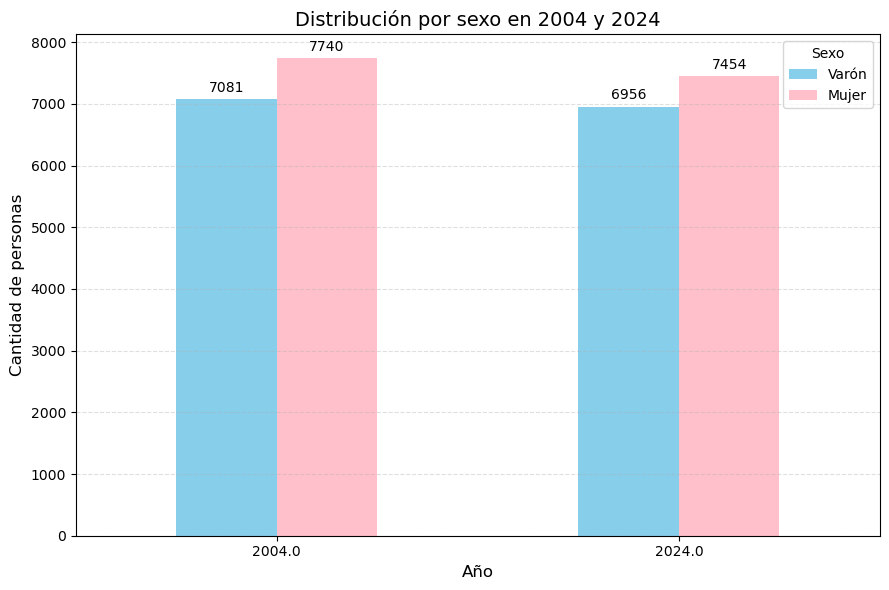

In [3]:
df_sexo = df_combined[
    (df_combined['ANO4'].isin([2004, 2024])) &
    (df_combined['CH04'].isin([1, 2, 'Varón', 'Mujer', ' Mujer']))
][['ANO4', 'CH04']].copy()

df_sexo['CH04'] = df_sexo['CH04'].astype(str).str.strip()
df_sexo['CH04'] = df_sexo['CH04'].replace({'1': 'Varón', '2': 'Mujer'})

sexo_counts = df_sexo.groupby(['ANO4', 'CH04']).size().unstack()
sexo_counts = sexo_counts[['Varón', 'Mujer']]

colors = ['skyblue', 'pink']  

ax = sexo_counts.plot(kind='bar', figsize=(9, 6), color=colors)

plt.title('Distribución por sexo en 2004 y 2024', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de personas', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Sexo')

for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

### Los datos muestran una leve inclinacion hacia las mujeres las cuales son mas en la region pampeana tanto en el año 2004 como en el 2024, aunque la diferencia no es tan grande.

## Ejercicio 4


              CH04      CH06      CH07      CH08  NIVEL_ED    ESTADO  \
CH04      1.000000  0.027126  0.014494  0.043973 -0.035706  0.137601   
CH06      0.027126  1.000000 -0.535152 -0.048921 -0.243565 -0.325754   
CH07      0.014494 -0.535152  1.000000  0.026503  0.121840  0.424973   
CH08      0.043973 -0.048921  0.026503  1.000000 -0.008892 -0.004555   
NIVEL_ED -0.035706 -0.243565  0.121840 -0.008892  1.000000  0.099503   
ESTADO    0.137601 -0.325754  0.424973 -0.004555  0.099503  1.000000   
CAT_INAC  0.001354  0.167132 -0.200791  0.006932  0.591411  0.203354   
IPCF     -0.259712  0.117267 -0.044263 -0.067815  0.267003 -0.096135   

          CAT_INAC      IPCF  
CH04      0.001354 -0.259712  
CH06      0.167132  0.117267  
CH07     -0.200791 -0.044263  
CH08      0.006932 -0.067815  
NIVEL_ED  0.591411  0.267003  
ESTADO    0.203354 -0.096135  
CAT_INAC  1.000000 -0.007430  
IPCF     -0.007430  1.000000  


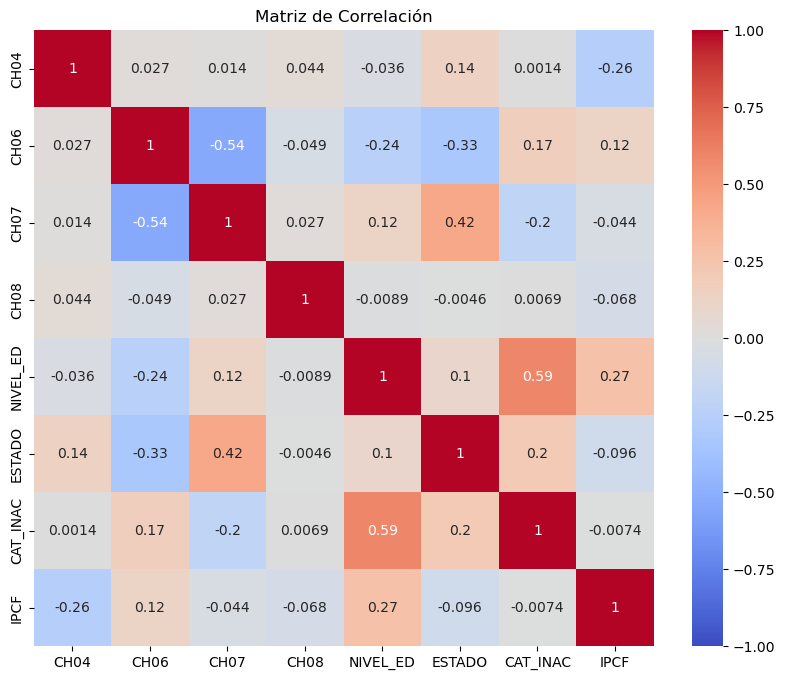

In [6]:
df_matriz = pd.read_excel("datos_region43.xlsx")
pd.set_option('future.no_silent_downcasting', True)

variables = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF', 
            ]

df_matriz = df_matriz[variables]

df_matriz['CH04'] = df_matriz['CH04'].map({'Varón': 1, 'Mujer': 2})
df_matriz['CH06'] = df_matriz['CH06'].replace({'Menos de 1 año': 0.5, '98 y más años': 102})
df_matriz['CH07'] = df_matriz['CH07'].map({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5}).astype('Int64')
df_matriz['CH08'] = df_matriz['CH08'].map({'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Planes y seguros públicos': 3,'No paga ni le descuentan': 4, 'Ns./Nr': 9, 'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Obra social y planes y seguros públicos': 13, 'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23, 'Obra social, mutual/prepaga/servicio de emergencia y planes': 123 })
df_matriz['NIVEL_ED'] = df_matriz['NIVEL_ED'].map({'Primaria Incompleta (incluye educación especial)': 1, 'Primaria Completa': 2, 'Secundaria Incompleta': 3,  'Secundaria Completa': 4,'Superior Universitaria Incompleta': 5,'Superior Universitaria Completa': 6,'Sin instrucción': 7,'Ns./ Nr.': 9})
df_matriz['ESTADO'] = df_matriz['ESTADO'].map({ 'Entrevista individual no realizada (no respuesta al cuestion': 0, 'Ocupado': 1,'Desocupado': 2,'Inactivo': 3,'Menor de 10 años': 4})
df_matriz['CAT_INAC'] = df_matriz['CAT_INAC'].map({'Jubilado/Pensionado': 1, 'Rentista': 2,'Estudiante': 3, 'Ama de casa': 4,'Menor de 6 años': 5,'Discapacitado': 6,'Otros': 7})

df_matriz_filtered = df_matriz[variables]

correlation_matrix = df_matriz_filtered.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

## Parte 3 - Ejercicio 5

In [93]:
    print('\033[1m')
    print("1. N° de desocupados e inactivos en la muestra")
    print('\033[0m') ## (Esto es solo para poner el titulo en bold)

# ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos?
print(df_combined[df_combined['ESTADO'].isin(['Desocupado', 'Inactivo'])]['ESTADO'].value_counts()) # .isin filtra por los valores deseados.

# ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)? 
    print('\033[1m')
    print("2. Ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)")
    print('\033[0m') ## (Esto es solo para poner el titulo en bold)

mean_ipcf = df_combined[df_combined['ESTADO'].isin(['Ocupado', 'Desocupado','Inactivo'])].groupby('ESTADO')['IPCF'].mean().round() 
print(mean_ipcf)


1. N° de desocupados e inactivos en la muestra

ESTADO
Inactivo      11721
Desocupado     1488
Name: count, dtype: int64

2. Ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)

ESTADO
Desocupado    30396.0
Inactivo      69563.0
Ocupado       94628.0
Name: IPCF, dtype: float64


## Parte 3 - Ejercicio 6

In [5]:
import pandas as pd
import numpy as np

df_encu = pd.read_excel("datos_region43.xlsx")
#Cuántas personas no respondieron cuál es su condición de actividad? 
print(df_encu[df_encu['ESTADO'].isin(['Entrevista individual no realizada (no respuesta al cuestion'])]['ESTADO'].value_counts())
#Guarden como una base distinta llamada no respondieron las observaciones donde no_respondieron la pregunta sobre su condición de actividad (ESTADO)
df_no_responden=(df_encu[df_encu['ESTADO'].isin(["Entrevista individual no realizada (no respuesta al cuestion"])])
df_no_responden.to_excel("no_respondieron.xlsx", index=False)
#Guarden como una base distinta llamada si_respondieron las observaciones donde respondieron la pregunta sobre su condición de actividad (ESTADO)                     
df_si_responden=(df_encu[df_encu['ESTADO'].isin(["Ocupado","Inactivo","Desocupado","Menor de 10 años"])])
df_si_responden.to_excel("si_respondieron.xlsx", index=False)

ESTADO
Entrevista individual no realizada (no respuesta al cuestion    27
Name: count, dtype: int64


## Parte 3 - Ejercicio 7

C:\Users\Mi compu\AppData\Local\Temp\ipykernel_9664\1117622654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_si_responden['PEA'] = np.where(df_si_responden['ESTADO'].isin(['Desocupado', 'Ocupado']), 1, 0)


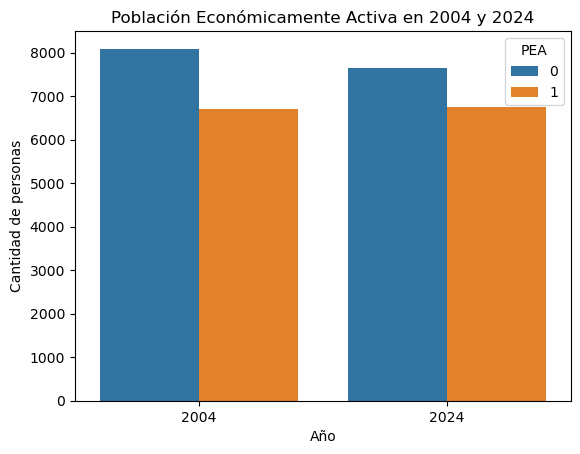

In [75]:
df_si_responden['PEA'] = np.where(df_si_responden['ESTADO'].isin(['Desocupado', 'Ocupado']), 1, 0)
df_si_responden[["ESTADO","PEA"]] # Verificación de: si DESOCUPADO u OCUPADO = 1

sns.countplot(data=df_si_responden, x='ANO4', hue='PEA') #countplot da un resultado mucho más prolijo que barplot y sigue siendo un gráfico de barras.

plt.title("Población Económicamente Activa en 2004 y 2024")
plt.xlabel("Año")
plt.ylabel("Cantidad de personas")
plt.legend(title='PEA')
plt.show()

### La cantidad de Desocupados & Ocupados [1] siempre fue menor al resto de la estadística (Inactivo, Menor de 10 años, No responde) [0], aunque la brecha se fue estabilizando para 2024.

## Parte 3 - Ejercicio 8

C:\Users\Mi compu\AppData\Local\Temp\ipykernel_9664\3076428784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_si_responden['CH06'] = pd.to_numeric(df_si_responden['CH06'], errors='coerce') # Este codigo no me hizo falta a mi pero recomendable usar en caso de que se necesite reconocer a los valores de CH06 (edad) como numero y no como str/int.
C:\Users\Mi compu\AppData\Local\Temp\ipykernel_9664\3076428784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_si_responden['PET'] = np.where((df_si_res

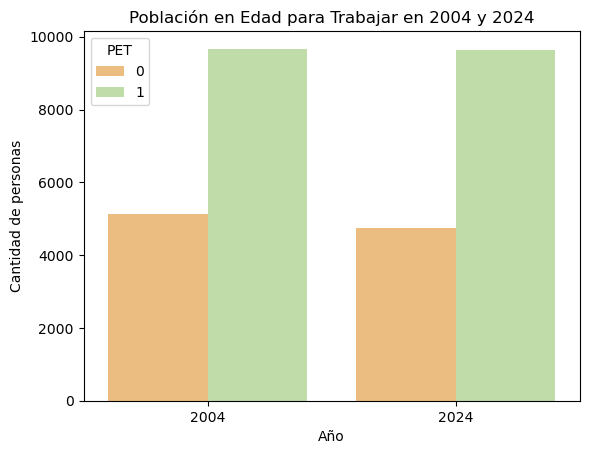

In [ ]:
df_si_responden['CH06'] = pd.to_numeric(df_si_responden['CH06'], errors='coerce') # Este codigo no me hizo falta a mi pero recomendable usar en caso de que se necesite reconocer a los valores de CH06 (edad) como numero y no como str/int.
df_si_responden['PET'] = np.where((df_si_responden['CH06'] >= 15) & (df_si_responden['CH06'] <= 65), 1, 0)
df_si_responden[["CH06","PET"]] # Esto muestra la verificación: 15 < CH06 < 65 = 1.

sns.countplot(data=df_si_responden, x='ANO4', hue='PET', palette='Spectral') # (https://seaborn.pydata.org/tutorial/color_palettes.html)

plt.title("Población en Edad para Trabajar en 2004 y 2024")
plt.xlabel("Año")
plt.ylabel("Cantidad de personas")
plt.legend(title='PET')
plt.show()

### La población en edad para trabajar se mantuvo casi constante entre 2004 y 2024, mientras que la población no apta para trabajar se redujo en el 2024.
En comparación con el PEA, podemos notar que la población que participa del mercado laboral se mantuvo dentro de todo constante a través del tiempo.

## Parte 3 - Ejercicio 9

In [ ]:
df_si_responden['Desocupado'] = np.where(df_si_responden['ESTADO'].isin(['Desocupado']), 1, 0)
# df_si_responden[["ESTADO","Desocupado"]] ## Esto nos permitira ver que funciona correctamente la verificación. 

#¿Cuántas personas están desocupadas en 2004 vs 2024? 
desocupados_por_año = df_si_responden.groupby('ANO4')['Desocupado'].sum()

print('\033[1m')
print("Cantidad de personas desocupadas por año (2004 | 2024):")
print('\033[0m')

print(desocupados_por_año)


Cantidad de personas desocupadas por año (2004 | 2024):

ANO4
2004    1035
2024     453
Name: Desocupado, dtype: int32


C:\Users\Mi compu\AppData\Local\Temp\ipykernel_9664\4250981274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_si_responden['Desocupado'] = np.where(df_si_responden['ESTADO'].isin(['Desocupado']), 1, 0)
